## Observations and Insights 

In [127]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head()
#study_data_complete.count()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [128]:
# let us look for duplicates and eliminate all
study_data_complete["Mouse ID"].nunique()
#len(study_data_complete["Mouse ID"].unique())
duplicates_df = study_data_complete[study_data_complete.duplicated(subset=["Mouse ID","Timepoint"],keep="first")]
#study_data_complete.duplicated(subset=["Mouse ID","Timepoint"])
duplicates_df
study_data_complete.loc[study_data_complete["Mouse ID"] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [129]:
# Checking the number of mice.
study_data_complete["Mouse ID"].nunique()

249

In [130]:
#study_df = study_data_complete.groupby(["Mouse ID"])["Timepoint"].nunique()

# We are now going to eliminate duplicates we user the keep option
# if keep is False then all duplictes are eliminate
# if keep = First then only the first is kept
# if keep = Last then only the last value is kept

clean_data_df= study_data_complete.drop_duplicates(subset=["Mouse ID","Timepoint"],keep=False)
#df.drop_duplicates(subset=['brand', 'style'], keep='last')
#study_data_complete["Mouse ID"].nunique()

#clean_data_df = study_data_complete[study_data_complete["Mouse ID"] isin]
# checking if the duplicates are gone
clean_data_df.loc[clean_data_df["Mouse ID"] == "g989"]
#clean_data_grp = clean_data_df.groupby(["Mouse ID"])
#clean_data_grp.count()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1195,g989,25,56.045564,1,Propriva,Female,21,26
1380,g989,30,59.082294,1,Propriva,Female,21,26
1592,g989,35,62.570880,2,Propriva,Female,21,26


In [131]:
# checking after cleanup
clean_data_df["Mouse ID"].nunique()

249

## Summary Statistics

In [132]:
# getting summary values bu grouping and then running the mean median var etc individually
regimen_grp =clean_data_df.groupby(["Drug Regimen"])
mean_val = regimen_grp.mean()["Tumor Volume (mm3)"]
median_val = regimen_grp.median()["Tumor Volume (mm3)"]
var_val = regimen_grp.var()["Tumor Volume (mm3)"]
std_val = regimen_grp.std()["Tumor Volume (mm3)"]
sem_val = regimen_grp.sem()["Tumor Volume (mm3)"]
summary_df = pd.DataFrame({
                "Mean Tumor Volume": mean_val ,
                "Median Tumor Volume":median_val,
                "Tumor Variance":var_val,
                "Tumor StDev":std_val,
                "Tumor SEM":sem_val})
summary_df
#.agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})

,Mean Tumor Volume,Median Tumor Volume,Tumor Variance,Tumor StDev,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [133]:
# calculating the mean median and other values using the agg function
clean_data_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.458254  50.854632  44.053659  6.637293  0.540135
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

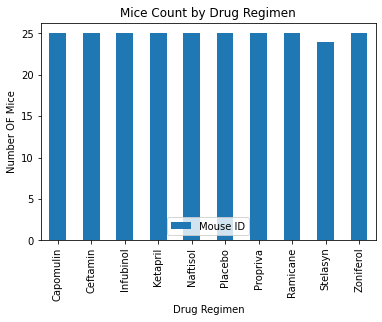

In [103]:
# we now graph them on a bar plot using the dataframe we also group by before
drug_regimens = clean_data_df["Drug Regimen"].unique()
regimens_grp = clean_data_df.groupby(["Drug Regimen"])
mice_count = regimens_grp.nunique()["Mouse ID"]
mice_count.plot(kind="bar")
plt.ylabel("Number OF Mice")
plt.xlabel("Drug Regimen")
plt.legend()
plt.title("Mice Count by Drug Regimen")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

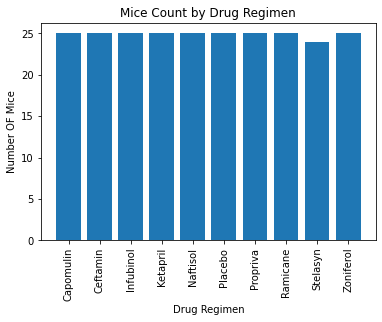

In [104]:
# we plot the same using the individual series of the data frame
plt.bar(mice_count.index.values,mice_count.values)
plt.ylabel("Number OF Mice")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.title("Mice Count by Drug Regimen")
plt.show

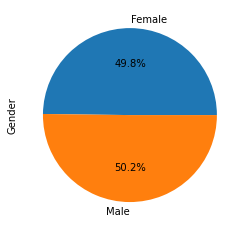

In [109]:
# Plotting the data by gender using dataframe and groupby
drug_regimens = clean_data_df["Drug Regimen"].unique()
gender_grp = clean_data_df.groupby(["Sex"])
gen_mice_count = gender_grp.nunique()["Mouse ID"]
gen_mice_count.plot(kind="pie",autopct="%1.1f%%")
plt.ylabel("Gender")
plt.show()

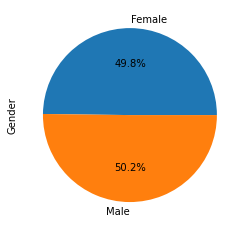

In [110]:
#plotting the data for gender stats using pie
plt.pie(gen_mice_count.values,labels=gen_mice_count.index.values,autopct="%1.1f%%")
plt.ylabel("Gender")
plt.show()

## Quartiles, Outliers and Boxplots

In [157]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# We setup a list and then use the isin filter 

targeted_list=["Capomulin","Ramicane","Infubinol","Ceftamin"]
targeted_df = clean_data_df[clean_data_df["Drug Regimen"].isin(targeted_list)]
targeted_df.head()


# set drug regimen as index and drop associated regimens while only keeping Capomulin, Ramicane, Infubinol, and Ceftamin

# isolated view of just capomulin for later use
capomulin_df = clean_data_df[clean_data_df["Drug Regimen"]=="Capomulin"]
capomulin_df

# Reset index so drug regimen column persists after inner merge


# get mouse count per drug
regimen_mouse_counts = targeted_df.groupby("Drug Regimen")["Mouse ID"].nunique().reset_index()
#regimen_mouse_counts
# for each mice we want to get the last time by getting max time point
# we use group by and then reset the index to convert it into a dataframe
last_timepoint = targeted_df.groupby(["Mouse ID"])["Timepoint"].max()
#last_timepoint.head()
last_timepoint=last_timepoint.reset_index()
last_timepoint.head()


,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a275,45
3,a411,45
4,a444,45


In [160]:
# we join the cleaned data to the last timepoint data frame using merge using a join on mouseid and timepoint
#this will  ensure we only have data for the last timepoint for each mouse
clean_merged_df =last_timepoint.merge(targeted_df,on=["Mouse ID","Timepoint"])
clean_merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [172]:
# now we have all the data for getting the quartile and outliers
final_tumor_vol_median = clean_merged_df["Tumor Volume (mm3)"].median()
all_tumor_vol = clean_merged_df["Tumor Volume (mm3)"]
quartiles = all_tumor_vol.quantile([0.25,0.5,0.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]
inter_quart_range = upper_quartile-lower_quartile
lower_bound = lower_quartile - (1.5*inter_quart_range)
upper_bound = upper_quartile + (1.5*inter_quart_range)
outliers = all_tumor_vol.loc[(all_tumor_vol < lower_bound) | (all_tumor_vol > upper_bound)]
print(f"lower quartile of  tumor volume is : {lower_quartile}")
print(f"Upper quartile of tumor volume is :{upper_quartile}")
print(f"The the median of Tumor Volume is: {final_tumor_vol_median} ")
print(f"The interquartile range of Tumor Volume is: {inter_quart_range}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
if len(outliers) > 0:
    print(f"has these possible Outliers \n {outliers} \n" )


lower quartile of  tumor volume is : 37.1877438025
Upper quartile of tumor volume is :59.930261755
The the median of Tumor Volume is: 45.0 
The interquartile range of Tumor Volume is: 22.742517952499995
Values below 3.0739668737500097 could be outliers.
Values above 94.04403868374999 could be outliers.


In [176]:
# this may not be needed but we are trying to perform the same excercise as above for each drug regimen
drug_regimens = clean_merged_df["Drug Regimen"].unique()
#drug_regimens
tumor_volume = []
for regimen in drug_regimens:
    final_tumor_volume = clean_merged_df.loc[clean_merged_df["Drug Regimen"] == regimen,"Tumor Volume (mm3)"]
    tumor_volume.append(final_tumor_volume)
    quartiles = final_tumor_volume.quantile([0.25,0.5,0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    inter_quart_range = upper_quartile-lower_quartile
    lower_bound = lower_quartile - (1.5*inter_quart_range)
    upper_bound = upper_quartile + (1.5*inter_quart_range)
    outliers = final_tumor_volume.loc[(final_tumor_volume < lower_bound) | (final_tumor_volume > upper_bound)]
    print(f"Drug Regimen {regimen} has lower quartile of {lower_quartile}")
    if len(outliers) > 0:
        print(f"Drug Regimen {regimen} has these possible Outliers \n {outliers} \n" )
          
        
    

Drug Regimen Infubinol has lower quartile of 54.04860769
Drug Regimen Infubinol has these possible Outliers 
 15    36.321346
Name: Tumor Volume (mm3), dtype: float64 

Drug Regimen Ceftamin has lower quartile of 48.72207785
Drug Regimen Ramicane has lower quartile of 31.56046955
Drug Regimen Capomulin has lower quartile of 32.37735684


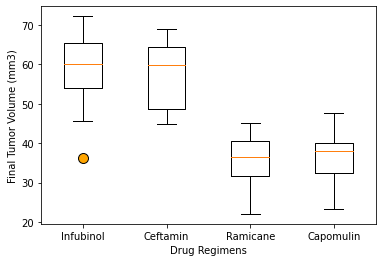

In [177]:
# creating box plots for thhe various drug regimens
# we collectd the tumor_volume for each one earlier
orange_out = dict(markerfacecolor = "orange",markersize=10)
plt.boxplot(tumor_volume ,labels=drug_regimens,flierprops=orange_out)
plt.xlabel("Drug Regimens")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

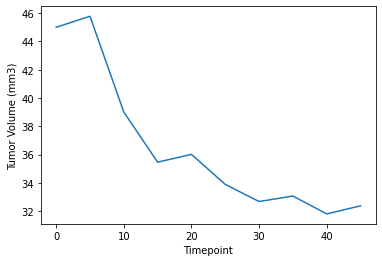

In [180]:
#plotting the tumor volume agains the timepoint for one mouse r554
capomulin_data_df = clean_data_df.loc[clean_data_df["Drug Regimen"]== "Capomulin"]
capomulin_data_df.head()
mouse_r554_df = clean_data_df.loc[clean_data_df["Mouse ID"]== "r554"]
mouse_r554_df.head()
plt.plot(mouse_r554_df["Timepoint"],mouse_r554_df["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show


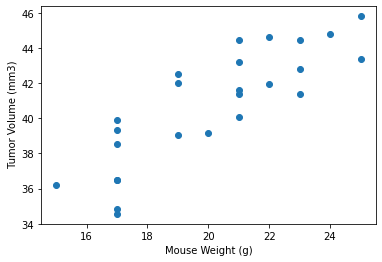

In [182]:
# drawinga scatter plot to analyze the correlation between mouse weight and tumor volume
# I guess this one should be obvious 
# fatter the mmouse the bigger its tumor
capomulin_average = capomulin_data_df.groupby(["Mouse ID"]).mean()
capomulin_average
plt.scatter(capomulin_average["Weight (g)"],capomulin_average["Tumor Volume (mm3)"] )
plt.xlabel("Mouse Weight (g)")
plt.ylabel(" Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation between the weight of the mouse and the tumor volume is strong : 0.84


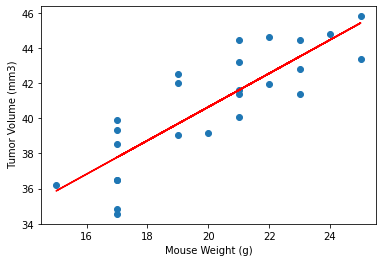

In [188]:
# calculating the correlation coefficent between the weight and the tumor volume
# we also use the linregress function to get the slope intercept and then plot the values
# for the linear equation
correlation_w_vol = round(st.pearsonr(capomulin_average["Weight (g)"],capomulin_average["Tumor Volume (mm3)"])[0],2)
print(f"The correlation between the weight of the mouse and the tumor volume is strong : {correlation_w_vol}")
model = st.linregress(capomulin_average["Weight (g)"],capomulin_average["Tumor Volume (mm3)"])
model_y_values = capomulin_average["Weight (g)"] * model[0] +  model[1]
plt.scatter(capomulin_average["Weight (g)"],capomulin_average["Tumor Volume (mm3)"] )
plt.plot(capomulin_average["Weight (g)"],model_y_values, color="red")
plt.xlabel("Mouse Weight (g)")
plt.ylabel(" Tumor Volume (mm3)")
plt.show()